In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv('./Projekt2021/spx500.csv', sep=',', parse_dates=True, index_col='Data')

df.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
1789-05-01,0.51,0.51,0.51,0.51,NaN
1789-06-01,0.51,0.51,0.51,0.51,NaN
1789-07-01,0.50,0.50,0.50,0.50,NaN
1789-08-01,0.50,0.51,0.50,0.51,NaN
1789-09-01,0.51,0.51,0.50,0.51,NaN


In [68]:
# Zmniejszamy zakres danych dla rocznego interwału
d = (datetime.today() - timedelta(days=365/2)).strftime('%Y-%d-%m')
df1 = df.loc[d:]
df1

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-11-12,3562.67,3569.02,3518.58,3537.01,2.414733e+09
2020-11-13,3552.57,3593.66,3552.57,3585.15,2.276725e+09
2020-11-16,3600.16,3628.51,3600.16,3626.91,2.864431e+09
2020-11-17,3610.31,3623.11,3588.68,3609.53,2.343227e+09
2020-11-18,3612.09,3619.09,3567.33,3567.79,2.667939e+09
...,...,...,...,...,...
2021-06-01,4216.52,4234.12,4197.59,4202.04,2.096973e+09
2021-06-02,4206.82,4217.37,4198.27,4208.12,2.028837e+09
2021-06-03,4191.43,4204.39,4167.93,4192.85,2.194432e+09


In [69]:
df1.index=df1.index.map(mdates.date2num)
df1.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
18578.0,3562.67,3569.02,3518.58,3537.01,2.414733e+09
18579.0,3552.57,3593.66,3552.57,3585.15,2.276725e+09
18582.0,3600.16,3628.51,3600.16,3626.91,2.864431e+09
18583.0,3610.31,3623.11,3588.68,3609.53,2.343227e+09
18584.0,3612.09,3619.09,3567.33,3567.79,2.667939e+09


In [70]:
# Sprawdzamy czy pierwsze wystąpiło max_v czy min_v
# Jeśli 1 jest min_v - trend wzrostowy
# Jeśli 1 jest max_v - trend spatkowy
Min_pozycja = df1['Najnizszy'].argmin()
Max_pozycja = df1['Najwyzszy'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')

Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 0


In [55]:
# Sprawdzamy czy pierwsze wystąpiło max_v czy min_v
# Jeśli 1 jest min_v - trend wzrostowy
# Jeśli 1 jest max_v - trend spatkowy
Min_pozycja = df1['Najnizszy'].argmin()
Max_pozycja = df1['Najwyzszy'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')

Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 72


In [71]:
Max_idx = df1.iloc[Max_pozycja].name
Max_idx

18754.0

In [72]:
#Pozycja Najniższej wartościw w indeksie
Ax = df1.iloc[Min_pozycja].name
Ax

18578.0

In [73]:
Ay = df1['Najnizszy'].loc[Ax]
Ay

3518.58

In [74]:
A = [Ax, Ay]
A

[18578.0, 3518.58]

In [75]:
df2 = df1[:Max_idx]
while len(df2)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df2.index, y=df2['Najnizszy'])
    df2 = df2.loc[df2['Najnizszy'] < slope * df2.index + intercept]
    
Bx = df2.index.min()
By = df2['Najnizszy'].loc[Bx]
B = [Bx, By]
B

[18690.0, 3723.34]

In [76]:
a = (Ay-By)/(Ax-Bx)
a

1.8282142857142876

In [77]:
b = By - a*Bx
b

-30445.985000000033

In [78]:
Cx = df1.index.max() +10
Cx

Cy = a*Cx +b
Cy

C = [Cx, Cy]

In [79]:
X = [A[0], C[0]]
Y = [A[1], C[1]]

In [80]:
df1.reset_index(inplace=True)

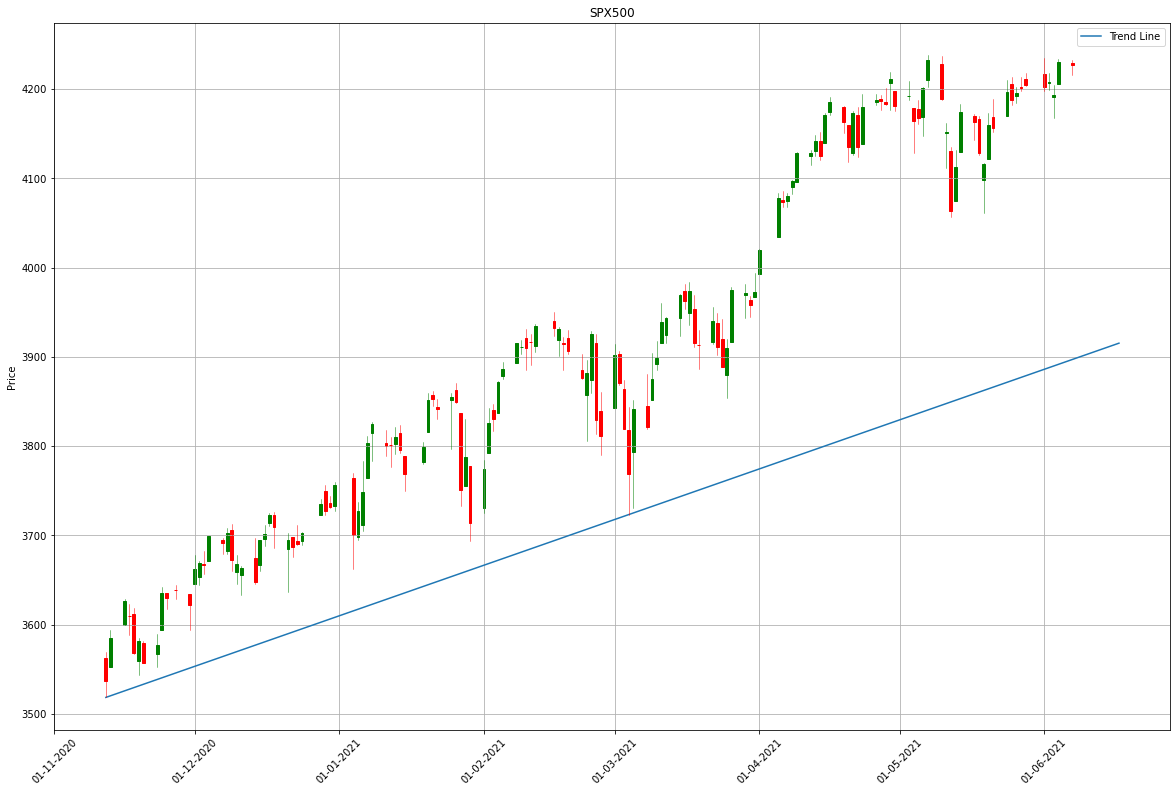

In [81]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X, Y, label='Trend Line')
plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()